AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [1]:
import pandas as pd
import csv

data = pd.read_csv('diabetic_data.csv')  
  

variance = data['num_med_proc'].var()  
print(f"方差 (num_med_proc): {variance}")  
  
std_deviation = data['num_med_proc'].std()  
print(f"标准差 (num_med_proc): {std_deviation}")  
  
covariance = data['num_med_proc'].cov(data['time_in_hospital'])  
print(f"协方差 (num_med_proc, timein_hospital): {covariance}")  
  
correlation = data['num_med_proc'].corr(data['time_in_hospital'])  
print(f"相关性 (num_med_proc, timein_hospital): {correlation}")  
  


方差 (num_med_proc): 556.7456310006736
标准差 (num_med_proc): 23.595457846811822
协方差 (num_med_proc, timein_hospital): 30.98368242457841
相关性 (num_med_proc, timein_hospital): 0.43961527948619517


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

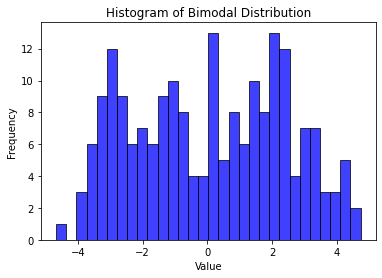

Kurtosis: -1.1475573702929809
Skewness: -0.002338851277759533


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(0)    
data1 = np.random.normal(loc=2, scale=1.2, size=100)  
data2 = np.random.normal(loc=-2, scale=1.2, size=100)  
   
combined_data = np.concatenate((data1, data2))  
   
plt.hist(combined_data, bins=30, alpha=0.75, color='blue', edgecolor='black')  
plt.title('Histogram of Bimodal Distribution')  
plt.xlabel('Value')  
plt.ylabel('Frequency')  
plt.show()  
    
kurt = kurtosis(combined_data)  
skewness = skew(combined_data)  
  
print(f"Kurtosis: {kurt}")  
print(f"Skewness: {skewness}")

AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

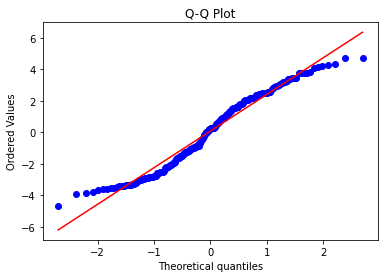

Shapiro-Wilk Test Statistic: 0.9619463682174683
Shapiro-Wilk Test p-value: 3.2309599191648886e-05
According to the Shapiro-Wilk test, the data are not normally distributed.
Anderson-Darling Test Statistic: 2.3264860936515106
Anderson-Darling Test Significance Levels: [15.  10.   5.   2.5  1. ]
Anderson-Darling Test Critical Values: [0.565 0.644 0.772 0.901 1.071]
According to the Shapiro-Wilk test, the data are not normally distributed.


In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import shapiro, anderson, probplot  
    
np.random.seed(0)  
data1 = np.random.normal(loc=2, scale=1.2, size=100)  
data2 = np.random.normal(loc=-2, scale=1.2, size=100)  
combined_data = np.concatenate((data1, data2))  
    
plt.figure()  
probplot(combined_data, dist="norm", plot=plt)  
plt.title('Q-Q Plot')  
plt.show()  
  
shapiro_test_statistic, shapiro_p_value = shapiro(combined_data)  
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")  
print(f"Shapiro-Wilk Test p-value: {shapiro_p_value}")  
  
 
if shapiro_p_value < 0.05:  
    print("According to the Shapiro-Wilk test, the data are not normally distributed.")  
else:  
    print("According to the Shapiro-Wilk test, the data are normally distributed.")  
  

anderson_test_result = anderson(combined_data)  
print(f"Anderson-Darling Test Statistic: {anderson_test_result.statistic}")  
print(f"Anderson-Darling Test Significance Levels: {anderson_test_result.significance_level}")  
print(f"Anderson-Darling Test Critical Values: {anderson_test_result.critical_values}")  
  

significance_levels = anderson_test_result.significance_level  
critical_values = anderson_test_result.critical_values  
   
closest_idx = np.argmin(np.abs(significance_levels - 0.05))  
  
critical_value_at_closest_significance_level = critical_values[closest_idx]  
   
if anderson_test_result.statistic > critical_value_at_closest_significance_level:  
    print("According to the Shapiro-Wilk test, the data are not normally distributed.")  
else:  
    print("According to the Shapiro-Wilk test, the data are normally distributed.")

AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

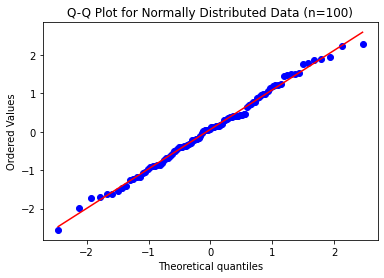

Shapiro-Wilk Test Statistic (n=100): 0.9926937818527222
Shapiro-Wilk Test p-value (n=100): 0.8689165711402893
Anderson-Darling Test Statistic (n=100): 0.18097695613924714
Anderson-Darling Test Critical Values (n=100): [0.555 0.632 0.759 0.885 1.053]
Anderson-Darling Test Significance Levels (n=100): [15.  10.   5.   2.5  1. ]
Shapiro-Wilk Test indicates that the data is normally distributed (n=100).
Anderson-Darling Test indicates that the data is normally distributed (n=100).


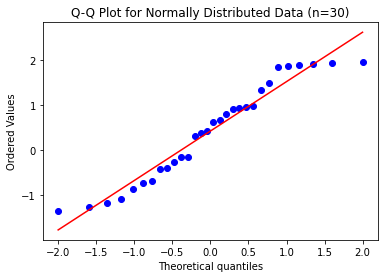

Shapiro-Wilk Test Statistic (n=30): 0.9320424199104309
Shapiro-Wilk Test p-value (n=30): 0.0556490384042263
Anderson-Darling Test Statistic (n=30): 0.5390589105016872
Anderson-Darling Test Critical Values (n=30): [0.521 0.593 0.712 0.83  0.988]
Anderson-Darling Test Significance Levels (n=30): [15.  10.   5.   2.5  1. ]
Shapiro-Wilk Test indicates that the data is normally distributed (n=30).
Anderson-Darling Test indicates that the data is normally distributed (n=30).


In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import probplot, shapiro, anderson  
  
np.random.seed(0)  
  
normal_data_100 = np.random.normal(loc=0, scale=1, size=100)  
  
plt.figure()  
probplot(normal_data_100, dist="norm", plot=plt)  
plt.title('Q-Q Plot for Normally Distributed Data (n=100)')  
plt.show()  
  
# Shapiro-Wilk Test  
shapiro_test_statistic_100, shapiro_p_value_100 = shapiro(normal_data_100)  
print(f"Shapiro-Wilk Test Statistic (n=100): {shapiro_test_statistic_100}")  
print(f"Shapiro-Wilk Test p-value (n=100): {shapiro_p_value_100}")  
  
# Anderson-Darling Test  
anderson_test_result_100 = anderson(normal_data_100)  
print(f"Anderson-Darling Test Statistic (n=100): {anderson_test_result_100.statistic}")  
print(f"Anderson-Darling Test Critical Values (n=100): {anderson_test_result_100.critical_values}")  
print(f"Anderson-Darling Test Significance Levels (n=100): {anderson_test_result_100.significance_level}")  
  
# result
if shapiro_p_value_100 > 0.05:  
    print("Shapiro-Wilk Test indicates that the data is normally distributed (n=100).")  
else:  
    print("Shapiro-Wilk Test indicates that the data is not normally distributed (n=100).")  
  
closest_significance_level_idx_100 = np.argmin(np.abs(anderson_test_result_100.significance_level - 0.05))  
closest_critical_value_100 = anderson_test_result_100.critical_values[closest_significance_level_idx_100]  
if anderson_test_result_100.statistic < closest_critical_value_100:  
    print("Anderson-Darling Test indicates that the data is normally distributed (n=100).")  
else:  
    print("Anderson-Darling Test indicates that the data is not normally distributed (n=100).")  
  
# reduce to 30 
normal_data_30 = np.random.normal(loc=0, scale=1, size=30)  
  
# Q-Q Plot 
plt.figure()  
probplot(normal_data_30, dist="norm", plot=plt)  
plt.title('Q-Q Plot for Normally Distributed Data (n=30)')  
plt.show()  
  
# Shapiro-Wilk Test  
shapiro_test_statistic_30, shapiro_p_value_30 = shapiro(normal_data_30)  
print(f"Shapiro-Wilk Test Statistic (n=30): {shapiro_test_statistic_30}")  
print(f"Shapiro-Wilk Test p-value (n=30): {shapiro_p_value_30}")  
  
# Anderson-Darling Test 
anderson_test_result_30 = anderson(normal_data_30)  
print(f"Anderson-Darling Test Statistic (n=30): {anderson_test_result_30.statistic}")  
print(f"Anderson-Darling Test Critical Values (n=30): {anderson_test_result_30.critical_values}")  
print(f"Anderson-Darling Test Significance Levels (n=30): {anderson_test_result_30.significance_level}")  
  
if shapiro_p_value_30 > 0.05:  
    print("Shapiro-Wilk Test indicates that the data is normally distributed (n=30).")  
else:  
    print("Shapiro-Wilk Test indicates that the data is not normally distributed (n=30).")  
  
closest_significance_level_idx_30 = np.argmin(np.abs(anderson_test_result_30.significance_level - 0.05))  
closest_critical_value_30 = anderson_test_result_30.critical_values[closest_significance_level_idx_30]  
if anderson_test_result_30.statistic < closest_critical_value_30:  
    print("Anderson-Darling Test indicates that the data is normally distributed (n=30).")  
else:  
    print("Anderson-Darling Test indicates that the data is not normally distributed (n=30).")

AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

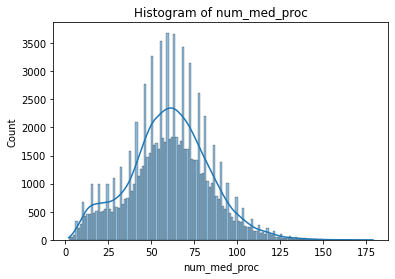

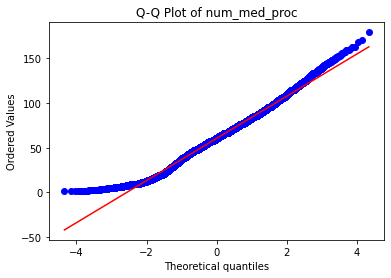

Anderson-Darling Test:
Statistic: 96.61245024697564
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]


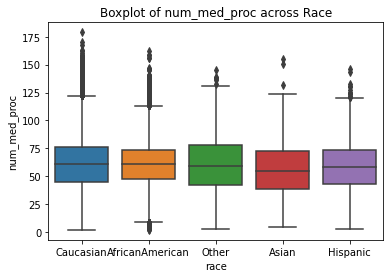

ANOVA Table:
                sum_sq       df          F        PR(>F)
C(race)   2.772367e+04      4.0  12.454718  3.962107e-10
Residual  5.536401e+07  99488.0        NaN           NaN
Kruskal-Wallis Test:
Statistic: 52.17798202426288
p-value: 1.2661582646035497e-10


In [7]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats
from scipy.stats import anderson, kruskal  
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
  
df = pd.read_csv('diabetic_data.csv')  
  
race_groups = df['race'].unique()  
  
sns.histplot(df['num_med_proc'], kde=True)  
plt.title('Histogram of num_med_proc')  
plt.show()  
  
stats.probplot(df['num_med_proc'], dist="norm", plot=plt)  
plt.title('Q-Q Plot of num_med_proc')  
plt.show()  
  
# 4. Anderson-Darling测试正态性  
ad_result = anderson(df['num_med_proc'])  
print('Anderson-Darling Test:')  
print('Statistic:', ad_result.statistic)  
print('Critical Values:', ad_result.critical_values)  
print('Significance Levels:', ad_result.significance_level)  
  
# 5. 使用箱线图可视化'num_med_proc'的分布  
sns.boxplot(x='race', y='num_med_proc', data=df)  
plt.title('Boxplot of num_med_proc across Race')  
plt.show()  
  
# 6. 设定假设检验的零假设和备择假设  
H0 = "不同种族间的医疗过程和药物数量没有显著差异"  
Ha = "不同种族间的医疗过程和药物数量有显著差异"  
  
# 7. 使用ANOVA测试（如果数据正态分布，这里我们假设通过了正态性检验）  
# 注意：在实际应用中，应该根据Anderson-Darling测试的结果来决定是否使用ANOVA  
model = ols('num_med_proc ~ C(race)', data=df).fit()  
anova_table = sm.stats.anova_lm(model, typ=2)  
print('ANOVA Table:')  
print(anova_table)  
  
# 8. 使用Kruskal-Wallis测试（如果数据非正态分布，或者作为稳健性检验）  
# 准备数据：将每个race类别的num_med_proc值放入一个列表  
race_data = [df[df['race'] == race]['num_med_proc'] for race in race_groups]  
  
# Kruskal-Wallis测试  
kw_result = kruskal(*race_data)  
print('Kruskal-Wallis Test:')  
print('Statistic:', kw_result.statistic)  
print('p-value:', kw_result.pvalue)  
  
